# BL40A2030 Wireless Communication Networks

## Week 6 - Assignment

### Author: Jaime Arturo Álvarez Orgaz

**1. (Poisson Point Process) Consider a given region with area $A = 100$ m^2.**

(a) Simulate and plot the histogram of number of points in this area $A$ considering that the density of point is $\lambda = 0.2$ points/m^2.

(b) Compare the simulated histogram with the analytical Poisson distribution.

(c) Present a snapshot of this Point process of this area considering that it is a square with side lenght $L=10$ m.

*Hint: In (a) and (b) there is no need to simulate the position, only the number of points; use the following to define the correct number of bins in the histogram: n_bins = np.max(samples_mean)-np.min(samples_mean) [check tutorial from week 2]. In (c), one snapshot is enough.* 


**2. (Closest-neighbor bound) During this week, the closest neighbor lower-bound of the outage probability when was presented. ** 

(a) What is the outage event and what is the meaning of this outage probability? 

(b) Explain why the closest-neighbor is a lower bound of the outage probability?

(c) Adapt the code provided in the tutorial to validate the bound as a function of $1< \beta <6$ considering $\lambda = 0.04$ (density of interferers in nodes per m^2), $d=1.5$, $\alpha = 4$.

*Hint: (a) Remember that the Spatial Point Process analysis characterizes events and their probabilities over different spatial realizations*


**3. (Performance analysis) Aggregate Information Efficiency for the bipolar networks:  $\lambda \times d \times (1-P_o) \times \log_2(1+\beta)$ **

(a) Plot the AIE as a function of $1 < \beta <6$ with $d=1.5$, $\alpha = 4$, and $\lambda = 0.05$.

(b) Plot the AIE as a function of $1 < d < 6$ with $\beta= 3$, $\alpha = 4$, and $\lambda = 0.01$.

(c) Plot the AIE as a function of $0.001 < \lambda<0.1$ with $d=1.5$, $\alpha = 4$, and $\beta= 3$.

(d) Comment the trade-offs captured by this metric based on the items (a)-(c).

*Hint: No need to simulate, only plot the mathematical formulation.*

In [1]:
import numpy as np 
import scipy.stats as ss
import matplotlib.pyplot as plt
from matplotlib import style
import math
#style.use('bmh')
from scipy.spatial import distance
#Not to show warning messages (to keep the notebook clean)
import warnings
warnings.filterwarnings('ignore')

**1A && 1B**

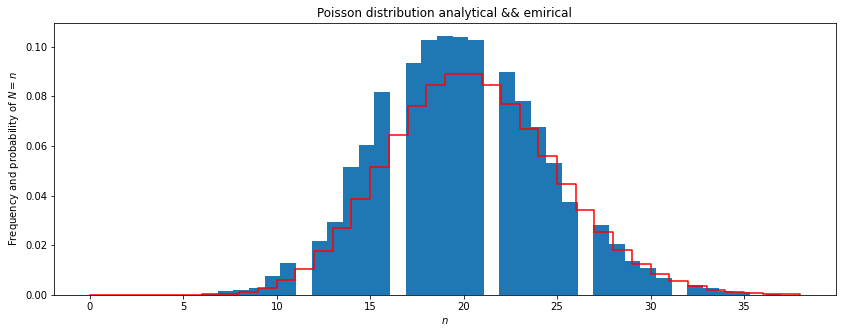

In [6]:
### Drawing a histogram (empirical distribution)
A = 100
mean = 0.2 * 100

samples_mean2 = np.random.poisson(mean, 10000) # this is the simulation. Mean is lambda and the other number is how many trials
n_bins2 = np.max(samples_mean2) # set the number of bins in the histogram based on the highest value in the outcome
##

#Analytical formula for Poisson
x = np.arange(0, ss.poisson.ppf(0.9999, mean)) # set the range from 0 to the 99.99% of probability of outcome
analytical = ss.poisson.pmf(x, mean) # creating a array with the values; check documentation and examples


plt.figure(figsize=(14,5))
plt.hist(samples_mean2,n_bins2, density=True)
plt.step(analytical,'r', where='post')
plt.xlabel('$n$')
plt.ylabel('Frequency and probability of $N = n$')
plt.title('Poisson distribution analytical && emirical')
plt.show() 

**1C**

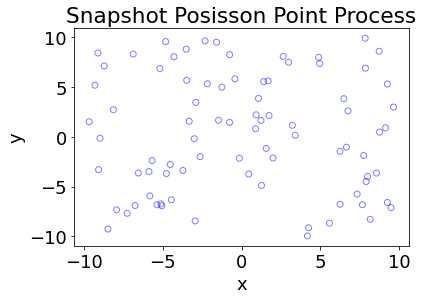

In [19]:
xMin=-10; xMax=10;
yMin=-10; yMax=10;
xDelta=xMax-xMin; yDelta=yMax-yMin; #rectangle dimensions
areaTotal=xDelta*yDelta;

#Point process parameters
lambda0=0.2; #intensity (ie mean density) of the Poisson process

#Simulate a Poisson point process
numbPoints = np.random.poisson(lambda0*areaTotal);#Poisson number of points
xx = xDelta*np.random.uniform(0,1,numbPoints)+xMin;#x coordinates of Poisson points
yy = yDelta*np.random.uniform(0,1,numbPoints)+yMin;#y coordinates of Poisson points

plt.scatter(xx, yy, edgecolor='b', facecolor='none', alpha=0.5);
plt.title('Snapshot Posisson Point Process')
plt.xlabel('x');
plt.ylabel('y');

**2A**

An outage even occurs when an active interfering transmitter lies inside the aread inside the dashed circumference and the reference transmitteris out of the range determined by the solid circle. 

Outage probability is the probability that a given information rate is not supported because of variable channel capacity. 

**2B**

The closest node to the receiver has the strongest signal. An outage event will appear if the closet-neighbour causes an interference. It can not make an upper bound if other nodes further away make an intereference.

**2C**

In [8]:
### Outage probability with Rayleigh
### Analytical - closed-form
def out_ray(d,beta,alpha,L,mean_poisson):
    kappa = math.gamma(1 + 2/alpha) * math.gamma(1- 2/alpha)
    return 1 - np.exp(-kappa * mean_poisson/L**2 * d**2 * np.pi * beta**(2/alpha))

In [9]:
### Probability of successful transmission = 1 -outage probability
### Simulation
def suc_prob_ray(d,beta,alpha,L,mean_poisson,trials):
    interference = np.zeros(trials)
    success = 0
    for j in range(trials):   
        #Number of nodes
        n = np.random.poisson(mean_poisson)
        #
        #Uniform distribution in x
        position_x_realization = np.random.uniform(-L/2,L/2,n)

        #Uniform distribution in y
        position_y_realization = np.random.uniform(-L/2,L/2,n)
        ##
        #Manipulating arrays to compute distances
        position_x_realization_t = np.transpose(position_x_realization) 
        position_y_realization_t = np.transpose(position_y_realization) 
        position_final = []
        position_final = [[position_x_realization_t[i], position_y_realization_t[i]] for i in range(n)]
        #position_final
        ###############
        #The distance to the rx1 (0,0)
        ###
        distance_rx = []
        distance_rx = [distance.euclidean(position_final[i],[0,0]) for i in range(n)]
        interference_i = []
        interference_i = [np.random.exponential(1)*distance_rx[i]**(-alpha) for i in range(n)]
        if np.sum(interference_i) * beta < np.random.exponential(1) * d**(-alpha): 
            success = success + 1
    return success/trials

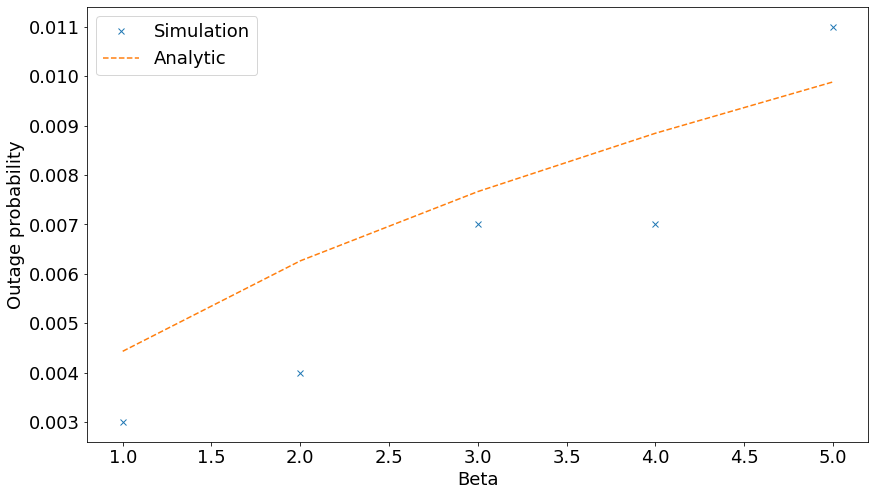

In [15]:
# 
d=1.5
beta= range(1,6)
alpha=4
L=100
dn=0.04
n_trials=1000

density = L * dn
###
out_simul = []
out_simul = [1 - suc_prob_ray(d,i,alpha,L,density,n_trials) for i in beta]
#Lower-bound
out_lb_ana = []
out_lb_ana = [out_ray(d,i,alpha,L,density) for i in beta]

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
plt.plot(beta, out_simul, 'x' , label='Simulation')
plt.plot(beta,out_lb_ana , '--' , label='Analytic')
plt.xlabel("Beta")
plt.ylabel("Outage probability")
plt.legend()
plt.show()

**3.A**

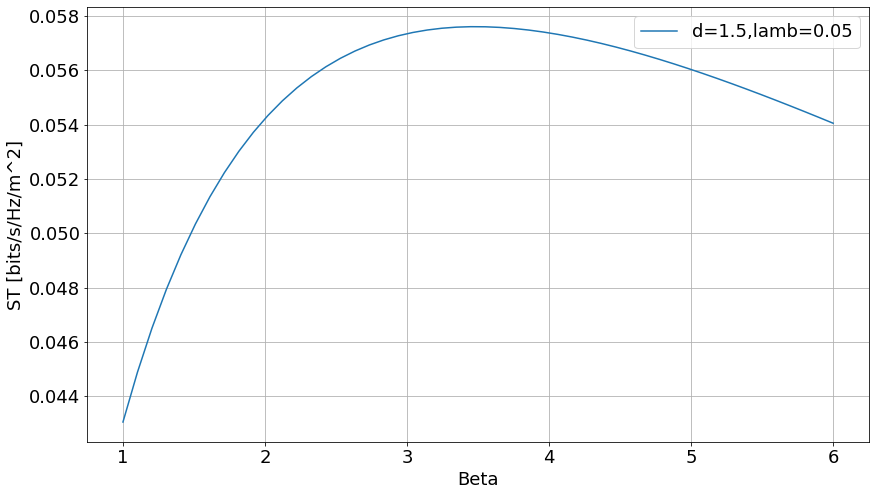

In [10]:
alpha = 4
beta = np.linspace(1,6)
d =1.5
lamb = 0.05

kappa = math.gamma(1 + 2/alpha) * math.gamma(1- 2/alpha)
AIE = [lamb * d * np.exp(-kappa * lamb * d**2 * np.pi * i**(2/alpha)) * np.log2(1+i) for i in beta]

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))

plt.plot(beta, AIE, '-' , label=r'd=1.5,lamb=0.05')

plt.xlabel("Beta")
plt.ylabel("ST [bits/s/Hz/m^2]")
plt.grid()
plt.legend()
plt.show()

**3.B**

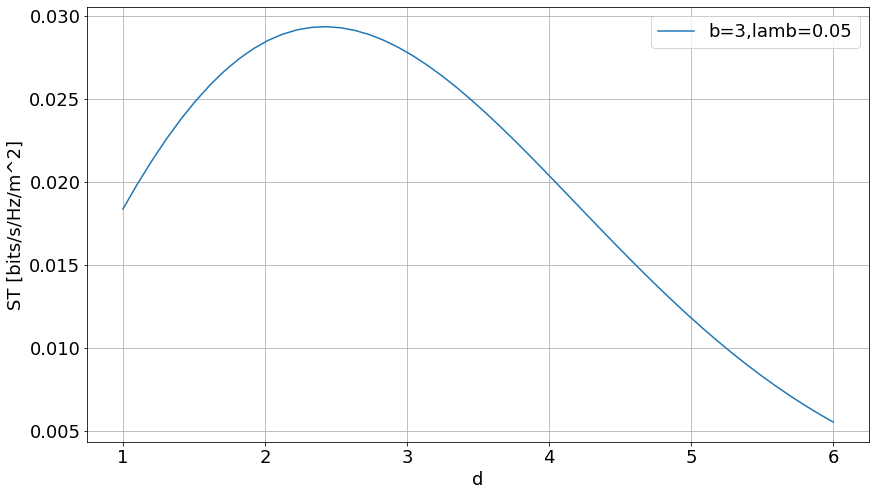

In [15]:
alpha = 4
beta = 3
d = np.linspace(1,6)
lamb = 0.01

kappa = math.gamma(1 + 2/alpha) * math.gamma(1- 2/alpha)
AIE = [lamb * i * np.exp(-kappa * lamb * i**2 * np.pi * beta**(2/alpha)) * np.log2(1+beta) for i in d]

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))

plt.plot(d, AIE, '-' , label=r'b=3,lamb=0.05')

plt.xlabel("d")
plt.ylabel("ST [bits/s/Hz/m^2]")
plt.grid()
plt.legend()
plt.show()

**3.C**

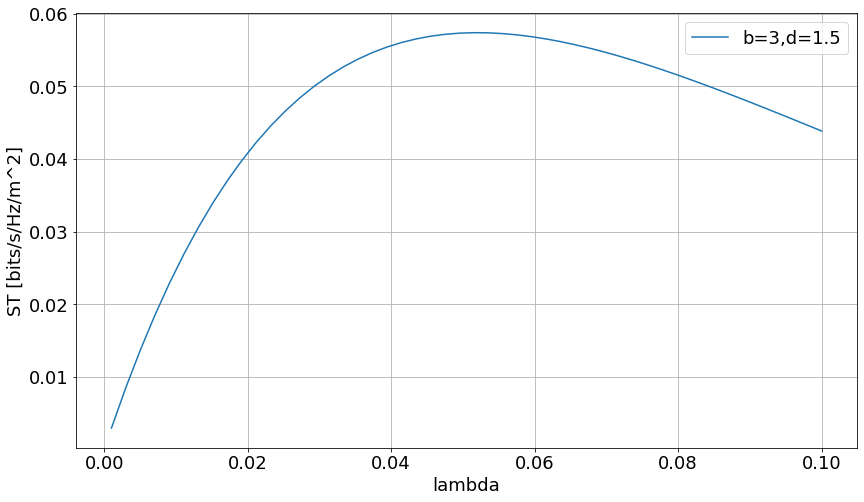

In [17]:
alpha = 4
beta = 3
d = 1.5
lamb = np.linspace(0.001, 0.1)

kappa = math.gamma(1 + 2/alpha) * math.gamma(1- 2/alpha)
AIE = [i * d * np.exp(-kappa * i * d**2 * np.pi * beta**(2/alpha)) * np.log2(1+beta) for i in lamb]

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))

plt.plot(lamb, AIE, '-' , label=r'b=3,d=1.5')

plt.xlabel("lambda")
plt.ylabel("ST [bits/s/Hz/m^2]")
plt.grid()
plt.legend()
plt.show()

**3.D**

On the three graphs we can notice that there is a point in the curve where the throughput is optimized. This means that each parameter depends on the others. Changing one will influence the rest.